In [ ]:
import warnings
warnings.filterwarnings('ignore')


#문제 상황

태양광 패널의 전기 생산 효율이 높을수록 더 많은 이익을 창출해낼 수 있다.

이를 위하여 고효율/저효율의 원인 분석을 하여, 높은 효율의 패널을 생산하기 위한 방법을 찾아보자.

#데이터 살펴보기

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Part4_12.csv')
print('Data shape: {}'.format(df.shape))

Data shape: (3500, 357)


In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [ ]:
df.head()

,Unnamed: 0.1,X39,X163,X18,X214,X204,X137,X230,X320,X348,X273,X210,X148,X311,X334,X76,X192,X312,X125,X158,X236,X136,X130,X240,X60,...,X302,X321,X200,X154,X51,X202,X108,X201,X183,X111,X324,X33,X4,X107,X77,X52,X68,X138,X189,X337,X31,X181,X64,X179,X308
0,1635,1.0,0.170213,0.030296,0.109624,0.087453,0.988722,0.589279,0,0,0.211494,0.0,0.978790,0,0,0.347510,0.00,0,1,0,0.214978,0.976520,0.638663,0.698529,0.787836,...,0,1,0.482017,0.991212,0.111111,0.862415,0,0,0.000183,1,0,0.526596,0.413148,0.351495,0.622549,1.000000,0.806404,0.988722,0.195349,0,0.058824,0.129310,0.520833,0.000000,0
1,2529,0.0,0.042553,0.000000,0.001064,0.118821,0.991855,0.741083,0,1,0.102874,0.0,0.991890,0,0,0.278784,0.50,0,1,1,0.585509,0.982294,0.635953,0.389706,0.408769,...,0,0,0.834538,0.991525,0.055556,0.779077,0,0,0.000214,1,0,0.053191,0.426541,0.106557,0.006506,0.714286,0.473799,0.991855,0.590698,1,0.941176,0.025862,0.764254,0.066667,0
2,525,0.0,0.021277,0.022947,0.190650,0.203422,0.057018,0.312513,0,0,0.293103,0.0,0.054273,0,0,0.330207,0.50,0,1,0,0.156236,0.007313,0.818428,0.713235,0.427157,...,0,0,0.586331,0.057125,0.944444,0.182553,0,0,0.000870,1,0,0.000000,0.289745,0.057377,0.008422,0.000000,0.457060,0.057018,0.497674,0,0.941176,0.034483,0.773026,0.000000,0
3,2125,0.4,0.021277,0.031105,0.157693,0.085551,0.991228,0.007144,0,0,0.112069,0.0,0.981285,0,0,0.719437,0.25,0,1,0,0.122516,0.988453,0.820235,0.735294,0.889674,...,0,1,0.510793,0.993723,1.000000,0.834991,0,0,0.000122,1,0,0.000000,0.314692,0.185632,0.294207,0.000000,0.920669,0.991228,0.223256,0,0.941176,0.060345,0.324561,0.000000,0
4,333,0.0,0.000000,0.041803,0.469900,0.000000,0.058897,0.033942,0,0,0.256897,0.0,0.059888,0,1,0.208603,0.25,0,1,1,0.145462,0.012317,0.635953,0.742647,0.797737,...,1,0,0.593527,0.057439,0.055556,0.358810,0,0,0.000046,1,0,0.058511,0.368981,0.051591,0.103253,0.714286,0.084425,0.058897,0.590698,1,0.941176,0.224138,0.410088,0.000000,0


In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 357 columns):
 #    Column        Dtype  
---   ------        -----  
 0    Unnamed: 0.1  int64  
 1    X39           float64
 2    X163          float64
 3    X18           float64
 4    X214          float64
 5    X204          float64
 6    X137          float64
 7    X230          float64
 8    X320          int64  
 9    X348          int64  
 10   X273          float64
 11   X210          float64
 12   X148          float64
 13   X311          int64  
 14   X334          int64  
 15   X76           float64
 16   X192          float64
 17   X312          int64  
 18   X125          int64  
 19   X158          int64  
 20   X236          float64
 21   X136          float64
 22   X130          float64
 23   X240          float64
 24   X60           float64
 25   X43           float64
 26   X207          float64
 27   X126          float64
 28   X244          float64
 29   X319          int6

In [ ]:
df.describe()

,Unnamed: 0.1,X39,X163,X18,X214,X204,X137,X230,X320,X348,X273,X210,X148,X311,X334,X76,X192,X312,X125,X158,X236,X136,X130,X240,X60,...,X302,X321,X200,X154,X51,X202,X108,X201,X183,X111,X324,X33,X4,X107,X77,X52,X68,X138,X189,X337,X31,X181,X64,X179,X308
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.0,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,0.487657,0.084833,0.024270,0.230101,0.292067,0.686795,0.189212,0.195429,0.18400,0.238004,0.119626,0.683072,0.074000,0.210857,0.387840,0.334143,0.101143,0.880571,0.532286,0.190684,0.669045,0.753550,0.718250,0.728899,...,0.129714,0.203429,0.607823,0.687337,0.395159,0.626377,0.0,0.100000,0.004744,0.998286,0.191714,0.245691,0.387527,0.151608,0.247858,0.575486,0.609136,0.686795,0.447814,0.532286,0.601782,0.112099,0.477399,0.091467,0.117714
std,1010.507298,0.431666,0.200089,0.020476,0.238434,0.290604,0.435907,0.247139,0.396587,0.38754,0.171181,0.319301,0.434064,0.261808,0.407975,0.215682,0.165073,0.301561,0.324338,0.499028,0.111401,0.455468,0.126288,0.136274,0.203985,...,0.336037,0.402606,0.113558,0.436711,0.423174,0.292337,0.0,0.300043,0.063087,0.041374,0.393706,0.289553,0.145952,0.092137,0.231266,0.431477,0.309106,0.435907,0.271559,0.499028,0.418949,0.135599,0.184968,0.245423,0.322316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,874.750000,0.000000,0.021277,0.014766,0.063542,0.117871,0.063283,0.019654,0.000000,0.00000,0.133333,0.000000,0.063007,0.000000,0.000000,0.203549,0.250000,0.000000,1.000000,0.000000,0.145409,0.015781,0.638663,0.713235,0.557284,...,0.000000,0.000000,0.550360,0.062775,0.055556,0.348846,0.0,0.000000,0.000076,1.000000,0.000000,0.000000,0.289209,0.087753,0.088815,0.000000,0.417758,0.063283,0.218605,0.000000,0.058824,0.034483,0.349781,0.000000,0.000000
50%,1749.500000,0.400000,0.021277,0.024565,0.138620,0.173004,0.985589,0.041099,0.000000,0.00000,0.192529,0.000000,0.979414,0.000000,0.000000,0.334411,0.250000,0.000000,1.000000,1.000000,0.160297,0.982294,0.816622,0.750000,0.820368,...,0.000000,0.000000,0.604317,0.986817,0.111111,0.791259,0.0,0.000000,0.000153,1.000000,0.000000,0.053191,0.366016,0.145130,0.202585,0.714286,0.707423,0.985589,0.446512,1.000000,0.882353,0.060345,0.395833,0.000000,0.000000
75%,2624.250000,1.000000,0.021277,0.033555,0.334100,0.261406,0.992481,0.305369,0.000000,0.00000,0.275862,0.000000,0.987523,0.000000,0.000000,0.553566,0.500000,0.000000,1.000000,1.000000,0.201725,0.986913,0.819332,0.772059,0.872701,...,0.000000,0.000000,0.665470,0.993409,0.944444,0.834991,0.0,0.000000,0.000748,1.000000,0.000000,0.526596,0.469507,0.202025,0.382353,1.000000,0.920669,0.992481,0.613953,1.000000,0.941176,0.129310,0.544956,0.000000,0.000000
max,3499.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [ ]:
df.index = df['Unnamed: 0.1']

In [ ]:
df.index.name = 'Real_index'

In [ ]:
df.head()

,Unnamed: 0.1,X39,X163,X18,X214,X204,X137,X230,X320,X348,X273,X210,X148,X311,X334,X76,X192,X312,X125,X158,X236,X136,X130,X240,X60,...,X302,X321,X200,X154,X51,X202,X108,X201,X183,X111,X324,X33,X4,X107,X77,X52,X68,X138,X189,X337,X31,X181,X64,X179,X308
Real_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1635,1635,1.0,0.170213,0.030296,0.109624,0.087453,0.988722,0.589279,0,0,0.211494,0.0,0.978790,0,0,0.347510,0.00,0,1,0,0.214978,0.976520,0.638663,0.698529,0.787836,...,0,1,0.482017,0.991212,0.111111,0.862415,0,0,0.000183,1,0,0.526596,0.413148,0.351495,0.622549,1.000000,0.806404,0.988722,0.195349,0,0.058824,0.129310,0.520833,0.000000,0
2529,2529,0.0,0.042553,0.000000,0.001064,0.118821,0.991855,0.741083,0,1,0.102874,0.0,0.991890,0,0,0.278784,0.50,0,1,1,0.585509,0.982294,0.635953,0.389706,0.408769,...,0,0,0.834538,0.991525,0.055556,0.779077,0,0,0.000214,1,0,0.053191,0.426541,0.106557,0.006506,0.714286,0.473799,0.991855,0.590698,1,0.941176,0.025862,0.764254,0.066667,0
525,525,0.0,0.021277,0.022947,0.190650,0.203422,0.057018,0.312513,0,0,0.293103,0.0,0.054273,0,0,0.330207,0.50,0,1,0,0.156236,0.007313,0.818428,0.713235,0.427157,...,0,0,0.586331,0.057125,0.944444,0.182553,0,0,0.000870,1,0,0.000000,0.289745,0.057377,0.008422,0.000000,0.457060,0.057018,0.497674,0,0.941176,0.034483,0.773026,0.000000,0
2125,2125,0.4,0.021277,0.031105,0.157693,0.085551,0.991228,0.007144,0,0,0.112069,0.0,0.981285,0,0,0.719437,0.25,0,1,0,0.122516,0.988453,0.820235,0.735294,0.889674,...,0,1,0.510793,0.993723,1.000000,0.834991,0,0,0.000122,1,0,0.000000,0.314692,0.185632,0.294207,0.000000,0.920669,0.991228,0.223256,0,0.941176,0.060345,0.324561,0.000000,0
333,333,0.0,0.000000,0.041803,0.469900,0.000000,0.058897,0.033942,0,0,0.256897,0.0,0.059888,0,1,0.208603,0.25,0,1,1,0.145462,0.012317,0.635953,0.742647,0.797737,...,1,0,0.593527,0.057439,0.055556,0.358810,0,0,0.000046,1,0,0.058511,0.368981,0.051591,0.103253,0.714286,0.084425,0.058897,0.590698,1,0.941176,0.224138,0.410088,0.000000,0


In [ ]:
df.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [ ]:
df.head()

,X39,X163,X18,X214,X204,X137,X230,X320,X348,X273,X210,X148,X311,X334,X76,X192,X312,X125,X158,X236,X136,X130,X240,X60,X43,...,X302,X321,X200,X154,X51,X202,X108,X201,X183,X111,X324,X33,X4,X107,X77,X52,X68,X138,X189,X337,X31,X181,X64,X179,X308
Real_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1635,1.0,0.170213,0.030296,0.109624,0.087453,0.988722,0.589279,0,0,0.211494,0.0,0.978790,0,0,0.347510,0.00,0,1,0,0.214978,0.976520,0.638663,0.698529,0.787836,0.230769,...,0,1,0.482017,0.991212,0.111111,0.862415,0,0,0.000183,1,0,0.526596,0.413148,0.351495,0.622549,1.000000,0.806404,0.988722,0.195349,0,0.058824,0.129310,0.520833,0.000000,0
2529,0.0,0.042553,0.000000,0.001064,0.118821,0.991855,0.741083,0,1,0.102874,0.0,0.991890,0,0,0.278784,0.50,0,1,1,0.585509,0.982294,0.635953,0.389706,0.408769,0.230769,...,0,0,0.834538,0.991525,0.055556,0.779077,0,0,0.000214,1,0,0.053191,0.426541,0.106557,0.006506,0.714286,0.473799,0.991855,0.590698,1,0.941176,0.025862,0.764254,0.066667,0
525,0.0,0.021277,0.022947,0.190650,0.203422,0.057018,0.312513,0,0,0.293103,0.0,0.054273,0,0,0.330207,0.50,0,1,0,0.156236,0.007313,0.818428,0.713235,0.427157,1.000000,...,0,0,0.586331,0.057125,0.944444,0.182553,0,0,0.000870,1,0,0.000000,0.289745,0.057377,0.008422,0.000000,0.457060,0.057018,0.497674,0,0.941176,0.034483,0.773026,0.000000,0
2125,0.4,0.021277,0.031105,0.157693,0.085551,0.991228,0.007144,0,0,0.112069,0.0,0.981285,0,0,0.719437,0.25,0,1,0,0.122516,0.988453,0.820235,0.735294,0.889674,1.000000,...,0,1,0.510793,0.993723,1.000000,0.834991,0,0,0.000122,1,0,0.000000,0.314692,0.185632,0.294207,0.000000,0.920669,0.991228,0.223256,0,0.941176,0.060345,0.324561,0.000000,0
333,0.0,0.000000,0.041803,0.469900,0.000000,0.058897,0.033942,0,0,0.256897,0.0,0.059888,0,1,0.208603,0.25,0,1,1,0.145462,0.012317,0.635953,0.742647,0.797737,0.230769,...,1,0,0.593527,0.057439,0.055556,0.358810,0,0,0.000046,1,0,0.058511,0.368981,0.051591,0.103253,0.714286,0.084425,0.058897,0.590698,1,0.941176,0.224138,0.410088,0.000000,0


In [ ]:
df.isnull().sum()

X39     0
X163    0
X18     0
X214    0
X204    0
       ..
X31     0
X181    0
X64     0
X179    0
X308    0
Length: 356, dtype: int64

In [ ]:
df.select_dtypes('int').head()

,X320,X348,X311,X334,X312,X125,X158,X319,X283,X323,X220,X350,X309,X128,X326,X315,X296,X297,X344,X330,X341,X333,X132,X140,X336,...,X349,X316,X287,X161,X299,X331,X343,X327,X340,X282,X329,X290,X281,X289,X151,X120,X310,X302,X321,X108,X201,X111,X324,X337,X308
Real_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1635,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2529,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
525,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,...,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2125,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
333,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0


In [ ]:
df.select_dtypes('int').columns

Index(['X320', 'X348', 'X311', 'X334', 'X312', 'X125', 'X158', 'X319', 'X283',
       'X323', 'X220', 'X350', 'X309', 'X128', 'X326', 'X315', 'X296', 'X297',
       'X344', 'X330', 'X341', 'X333', 'X132', 'X140', 'X336', 'X58', 'X339',
       'X219', 'X342', 'X346', 'X322', 'X328', 'X173', 'X298', 'X318', 'X317',
       'X335', 'X314', 'X338', 'X293', 'X294', 'X59', 'X345', 'X306',
       'Unnamed: 0', 'X300', 'X288', 'X295', 'X332', 'X354', 'X284', 'X285',
       'X303', 'X117', 'X291', 'X57', 'X325', 'X351', 'X305', 'X307', 'X304',
       'X114', 'X301', 'X286', 'X353', 'X352', 'X347', 'X292', 'X313', 'X349',
       'X316', 'X287', 'X161', 'X299', 'X331', 'X343', 'X327', 'X340', 'X282',
       'X329', 'X290', 'X281', 'X289', 'X151', 'X120', 'X310', 'X302', 'X321',
       'X108', 'X201', 'X111', 'X324', 'X337', 'X308'],
      dtype='object')

#문제해결 프로세스 정의

##문제정의

공정에서 정의한 값이 일정하게 정해지지 않았다.(온도, 미세먼지, 기압, 기계 setting값 등의 다양한 조건)

따라서 다양한 공정의 레시피들이 존재한다.

여러 레시피들 중 어떤 공정의 레시피가 가장 높은 효율을 보여주는지 찾아야 한다.

##기대효과

새로운 고효율군의 레시피를 찾아 공정 레시피를 적용하여, 새로운 설비투자 없이 이익이 더욱 극대화 될 수 있다고 예상된다.

##성과측정

고효율군의 공정 레세피를 적용한 후 cell의 효율성을 측정한다.

ex) 하루 100만장 cell의 효율이 0.2% 상승 시 cell 한장 당 효율 생산분을 계산

##해결방안


Binary classification을 통한 전동기 이상감지 분류

Session 1
- Data Loading(Transformation)
- Data Visualization

Session 2
- Data Preprocessing

Session 3
- Modeling
- Logistic Regression, LogisticRegression
- LinearRegression, LinearClassifier


#Session 1 - Data Loading & Visualization

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import re
import pickle
import joblib
import os



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error
import shap

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#null check
col = []
null_cell = []

for col in df.columns:

  miss =  df[col].isnull().sum() / df.shape[0]
  null_cell.append(round(miss, 4))

In [ ]:
#unique check
col = []
level = []

for cols in df.columns:
  lel = df[cols].dropna()
  level.append(len(list(set(lel))))

  col.append(cols)

In [ ]:
summary = pd.concat([pd.DataFrame(col, columns = ['name']),
                     pd.DataFrame(null_cell, columns = ['Null percentage']),
                     pd.DataFrame(level, columns = ['Unique'])], axis = 1)

In [ ]:
summary

,name,Null percentage,Unique
0,X39,0.0,3
1,X163,0.0,18
2,X18,0.0,193
3,X214,0.0,539
4,X204,0.0,136
...,...,...,...
351,X31,0.0,7
352,X181,0.0,33
353,X64,0.0,398
354,X179,0.0,11


In [ ]:
#unique가 1 이하인 col, null percentage가 0.8이상인 col 삭제
drop_col = summary['name'][(summary['Unique']) <= 1 | (summary['Null percentage'] >= 0.8)]
df.drop(drop_col, axis = 1, inplace = True)
print('>>>>> Data Shape : {}'.format(df.shape))

>>>>> Data Shape : (3500, 346)


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.head()

,X39,X163,X18,X214,X204,X137,X230,X320,X348,X273,X210,X148,X311,X334,X76,X192,X312,X125,X158,X236,X136,X130,X240,X60,X43,...,X180,X302,X321,X200,X154,X51,X202,X201,X183,X111,X324,X33,X4,X107,X77,X52,X68,X138,X189,X337,X31,X181,X64,X179,X308
Real_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1635,1.0,0.170213,0.030296,0.109624,0.087453,0.988722,0.589279,0,0,0.211494,0.0,0.978790,0,0,0.347510,0.00,0,1,0,0.214978,0.976520,0.638663,0.698529,0.787836,0.230769,...,0.11,0,1,0.482017,0.991212,0.111111,0.862415,0,0.000183,1,0,0.526596,0.413148,0.351495,0.622549,1.000000,0.806404,0.988722,0.195349,0,0.058824,0.129310,0.520833,0.000000,0
2529,0.0,0.042553,0.000000,0.001064,0.118821,0.991855,0.741083,0,1,0.102874,0.0,0.991890,0,0,0.278784,0.50,0,1,1,0.585509,0.982294,0.635953,0.389706,0.408769,0.230769,...,0.07,0,0,0.834538,0.991525,0.055556,0.779077,0,0.000214,1,0,0.053191,0.426541,0.106557,0.006506,0.714286,0.473799,0.991855,0.590698,1,0.941176,0.025862,0.764254,0.066667,0
525,0.0,0.021277,0.022947,0.190650,0.203422,0.057018,0.312513,0,0,0.293103,0.0,0.054273,0,0,0.330207,0.50,0,1,0,0.156236,0.007313,0.818428,0.713235,0.427157,1.000000,...,0.06,0,0,0.586331,0.057125,0.944444,0.182553,0,0.000870,1,0,0.000000,0.289745,0.057377,0.008422,0.000000,0.457060,0.057018,0.497674,0,0.941176,0.034483,0.773026,0.000000,0
2125,0.4,0.021277,0.031105,0.157693,0.085551,0.991228,0.007144,0,0,0.112069,0.0,0.981285,0,0,0.719437,0.25,0,1,0,0.122516,0.988453,0.820235,0.735294,0.889674,1.000000,...,0.05,0,1,0.510793,0.993723,1.000000,0.834991,0,0.000122,1,0,0.000000,0.314692,0.185632,0.294207,0.000000,0.920669,0.991228,0.223256,0,0.941176,0.060345,0.324561,0.000000,0
333,0.0,0.000000,0.041803,0.469900,0.000000,0.058897,0.033942,0,0,0.256897,0.0,0.059888,0,1,0.208603,0.25,0,1,1,0.145462,0.012317,0.635953,0.742647,0.797737,0.230769,...,0.19,1,0,0.593527,0.057439,0.055556,0.358810,0,0.000046,1,0,0.058511,0.368981,0.051591,0.103253,0.714286,0.084425,0.058897,0.590698,1,0.941176,0.224138,0.410088,0.000000,0


In [ ]:
drop_col

68     X344
95     X132
100    X140
154     X59
197    X354
212     X57
235    X114
241    X353
323    X151
337    X108
Name: name, dtype: object

In [ ]:
df['Y'].describe()

count    3500.000000
mean        0.765216
std         0.103392
min         0.000000
25%         0.712546
50%         0.777598
75%         0.834474
max         1.000000
Name: Y, dtype: float64

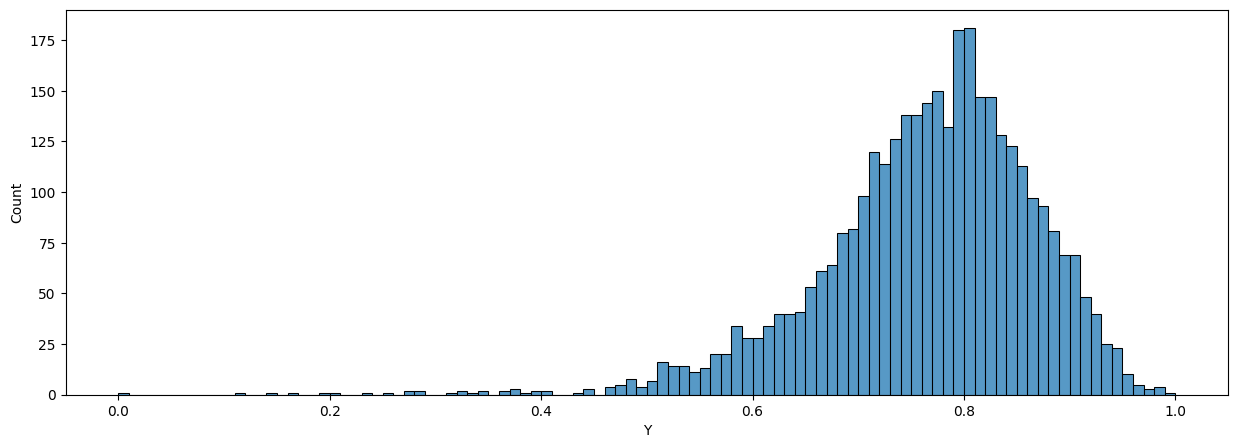

In [ ]:
plt.figure(figsize = (15, 5))
sns.histplot(df['Y'], bins =  100)
plt.show()

#Session 2 - Data Preprocessing

In [ ]:
#데이터를 X, Y로 나누고 X_train, X_test, y_train, y_test로 나누면 총 3번 데이터가 복사되어 메모리를 차지함
#메모리 사용율을 줄이기 위해 idx만 사용

y = df['Y']
X = df.drop('Y', axis = 1)

idx = list(range(X.shape[0]))#X.index가 아닌 이유는 .iloc를 사용할 것이기 때문
train_idx, val_idx = train_test_split(idx, test_size = 0.3, random_state = 2023)

print('Train data: {}'.format(len(train_idx)))
print('Test data: {}'.format(len(val_idx)))

Train data: 2450
Test data: 1050


In [ ]:
#Feature 가 많은 경우 빠르게 모델을 한번 돌려보기
n_tree = 500
l_rate = 0.05
m_depth = 18
L1_norm = 0.1

model = LGBMRegressor(n_estimators = n_tree, learning_rate = l_rate, max_depth = m_depth,
                      reg_alpha = L1_norm, n_jobs = -1)

model.fit(X.iloc[train_idx], y.iloc[train_idx])

#Train Acc
y_pre_train = model.predict(X.iloc[train_idx])
mse = mean_squared_error(y.iloc[train_idx], y_pre_train)
r2 = np.corrcoef(y.iloc[train_idx], y_pre_train)[0, 1]**2
print('Train MSE: ', mse)
print('Train R2: ', r2)

#Test Acc
y_pre_test = model.predict(X.iloc[val_idx])
mse = mean_squared_error(y.iloc[val_idx], y_pre_test)
r2 = np.corrcoef(y.iloc[val_idx], y_pre_test)[0, 1]**2
print('Test MSE: ', mse)
print('Test R2: ', r2)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30144
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 339
[LightGBM] [Info] Start training from score 0.765721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
#r2 score이 train과 test가 둘다 높을경우 X와 y의 상관관계가 매우 높은 독립변수가 있을 확률이 높다

In [ ]:
feature_map = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse = True), columns = ['Scores', 'Feature'])[:20]
print(feature_map)

    Scores Feature
0     1461      X1
1     1430      X2
2     1045      X3
3      201     X23
4      182      X6
5      181    X259
6      174     X71
7      169     X16
8      168     X22
9      165     X11
10     159    X275
11     155      X5
12     150    X272
13     145    X242
14     133    X254
15     130      X4
16     130     X10
17     125    X269
18     123     X13
19     121    X268


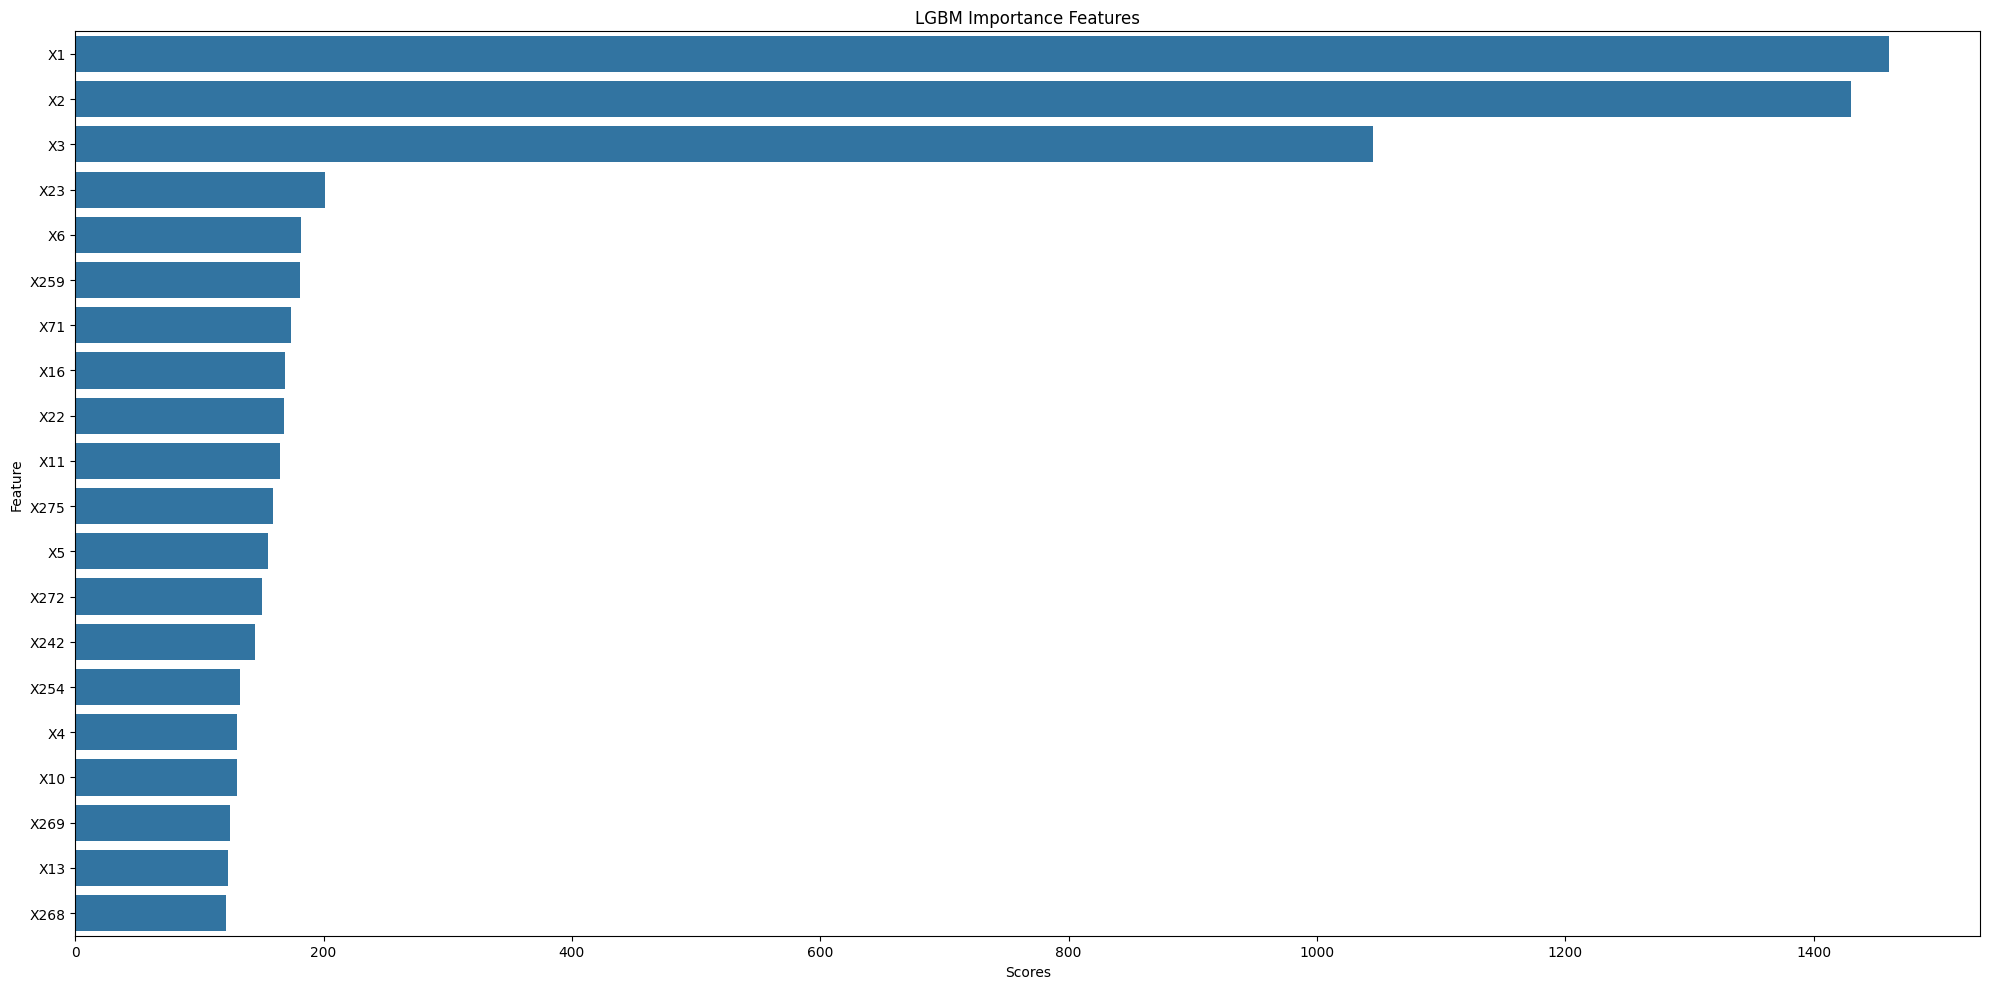

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Scores', y = 'Feature', data = feature_map.sort_values(by='Scores', ascending = False), errwidth =40)
plt.title('LGBM Importance Features')
plt.tight_layout()
plt.show()

In [ ]:
df['X1'].describe()

count    3500.000000
mean       84.757693
std         0.351666
min        81.661900
25%        84.561100
50%        84.783400
75%        85.001150
max        85.745600
Name: X1, dtype: float64

In [ ]:
df['X2'].describe()

count    3500.000000
mean       11.058408
std         0.040699
min        10.791300
25%        11.032575
50%        11.060500
75%        11.086100
max        11.161800
Name: X2, dtype: float64

In [ ]:
df['X3'].describe()

count    3500.000000
mean        0.705708
std         0.002689
min         0.684082
25%         0.704376
50%         0.705982
75%         0.707514
max         0.712631
Name: X3, dtype: float64

In [ ]:
#위의 X1, X2, X3은 표준편차가 매우 적음

#Session 3 - Modeling & Summary

In [ ]:
select = ['X1', 'X2', 'X3']

In [ ]:
#Linear Regression
results = LinearRegression().fit(X[select].iloc[train_idx], y.iloc[train_idx])

In [ ]:
results.score(X[select].iloc[val_idx], y.iloc[val_idx])

0.9999774379340146

In [ ]:
#Train Acc
y_pre_train = results.predict(X[select].iloc[train_idx])
mse = mean_squared_error(y.iloc[train_idx], y_pre_train)
r2 = np.corrcoef(y.iloc[train_idx], y_pre_train)[0, 1]**2
print('Train MSE: ', mse)
print('Train R2: ', r2)

#Test Acc
y_pre_test = results.predict(X[select].iloc[val_idx])
mse = mean_squared_error(y.iloc[val_idx], y_pre_test)
r2 = np.corrcoef(y.iloc[val_idx], y_pre_test)[0, 1]**2
print('Test MSE: ', mse)
print('Test R2: ', r2)

Train MSE:  2.352615063306886e-07
Train R2:  0.999977814866352
Test MSE:  2.454157545974917e-07
Test R2:  0.9999774570457186


In [ ]:
#mse는 거의 0에 가깝고
#마찬가지로 r2 score가 매우 높고 비슷하므로
#X1, X2, X3은 y와 매우 상관관계가 높은 변수라고 추측가능
#다만 val set의 r2 score가 높으므로 잘 구축된 모델이라고 볼 수 있음


In [ ]:
#상관관계가 매우 높은 독립변수 제거
X = X.drop(['X1', 'X2', 'X3'], axis = 1)

In [ ]:
#Bayesian Optimizer로 Hyperparameter Tuning

def lgbm_bay(n_estimators, learning_rate, max_depth, reg_alpha):
  model = LGBMRegressor(n_estimators = int(round(n_estimators)),
                        learning_rate = learning_rate,
                        max_depth = int(round(max_depth)),
                        reg_alpha = reg_alpha,
                        verbosity = -1)

  model.fit(X.iloc[train_idx], y.iloc[train_idx])


  #Train Acc
  y_pre_train = model.predict(X.iloc[train_idx])
  mse = mean_squared_error(y.iloc[train_idx], y_pre_train)
  r2 = np.corrcoef(y.iloc[train_idx], y_pre_train)[0, 1]**2
  print('Train MSE: ', mse)
  print('Train R2: ', r2)

  #Test Acc
  y_pre_test = model.predict(X.iloc[val_idx])
  mse = mean_squared_error(y.iloc[val_idx], y_pre_test)
  r2 = np.corrcoef(y.iloc[val_idx], y_pre_test)[0, 1]**2
  print('Test MSE: ', mse)
  print('Test R2: ', r2)

  return  r2

In [ ]:
pbounds = {
    'n_estimators': (100, 700),
    'learning_rate': (0.05, 0.1),
    'max_depth': (18, 36),
    'reg_alpha': (0.1, 1)
}

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization

lgbmBO = BayesianOptimization(f = lgbm_bay, pbounds = pbounds, verbose = 2, random_state = 0 )

In [ ]:
#r2 score는  현업에서 0.3이상인 경우를 찾기 어려움
#0.25이상이면 어느정도 유의미하다고 판단

lgbmBO.maximize(init_points=5, n_iter = 20)

|   iter    |  target   | learni... | max_depth | n_esti... | reg_alpha |
-------------------------------------------------------------------------
Train MSE:  0.0008202892266654004
Train R2:  0.9459847820938759
Test MSE:  0.00756229332159604
Test R2:  0.31116804875965887
| 1         | 0.3112    | 0.07744   | 30.87     | 461.7     | 0.5904    |
Train MSE:  0.0014391658697316806
Train R2:  0.9015961890661963
Test MSE:  0.007570849199782036
Test R2:  0.30811427105868344
| 2         | 0.3081    | 0.07118   | 29.63     | 362.6     | 0.9026    |
Train MSE:  0.0007286807130129833
Train R2:  0.9518785000032952
Test MSE:  0.007565521676756602
Test R2:  0.3114709598337511
| 3         | 0.3115    | 0.09818   | 24.9      | 575.0     | 0.576     |
Train MSE:  0.000986459843438789
Train R2:  0.9358523080711679
Test MSE:  0.007498939016159935
Test R2:  0.3138202554549263
| 4         | 0.3138    | 0.0784    | 34.66     | 142.6     | 0.1784    |
Train MSE:  0.001476217090353271
Train R2:  0.8998372192

In [ ]:
lgbmBO.max

{'target': 0.32136748987114666,
 'params': {'learning_rate': 0.06235758872586282,
  'max_depth': 34.80530523810243,
  'n_estimators': 144.18770118329888,
  'reg_alpha': 0.7444782826854701}}

In [ ]:
lgbmBO.max['params']['learning_rate']

0.06235758872586282

In [ ]:
lgbm = LGBMRegressor(learning_rate = lgbmBO.max['params']['learning_rate'],
                     max_depth = int(round(lgbmBO.max['params']['max_depth'])),
                     n_estimators = int(round(lgbmBO.max['params']['n_estimators'])),
                     reg_alpha = lgbmBO.max['params']['reg_alpha'],
                     verbosity = -1, random_state = 0)

In [ ]:
lgbm.fit(X.iloc[train_idx], y.iloc[train_idx])

LGBMRegressor(learning_rate=0.06235758872586282, max_depth=35, n_estimators=144,
              random_state=0, reg_alpha=0.7444782826854701, verbosity=-1)

In [ ]:
#Train Acc
y_pre_train = lgbm.predict(X.iloc[train_idx])
mse = mean_squared_error(y.iloc[train_idx], y_pre_train)
r2 = np.corrcoef(y.iloc[train_idx], y_pre_train)[0, 1]**2
print('Train MSE: ', mse)
print('Train R2: ', r2)

#Test Acc
y_pre_test = lgbm.predict(X.iloc[val_idx])
mse = mean_squared_error(y.iloc[val_idx], y_pre_test)
r2 = np.corrcoef(y.iloc[val_idx], y_pre_test)[0, 1]**2
print('Test MSE: ', mse)
print('Test R2: ', r2)

Train MSE:  0.0021091398727677356
Train R2:  0.8509184411020564
Test MSE:  0.007395050463891136
Test R2:  0.32136748987114666


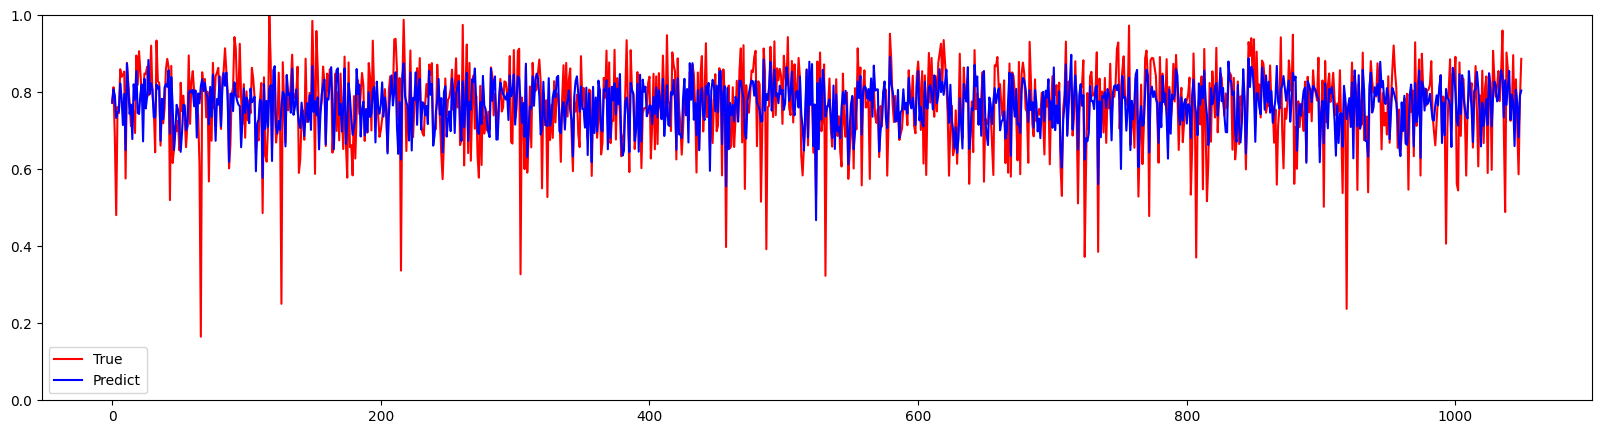

In [ ]:
#y의 추세
#어느정도 패턴은 잘 잡아냄
plot_X = list(range(len(val_idx)))

plt.figure(figsize = (20, 5))
plt.plot(plot_X, y.iloc[val_idx], c = 'Red', label = 'True')
plt.plot(plot_X, y_pre_test, c = 'Blue', label = 'Predict')
plt.legend()
plt.ylim(0, 1)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

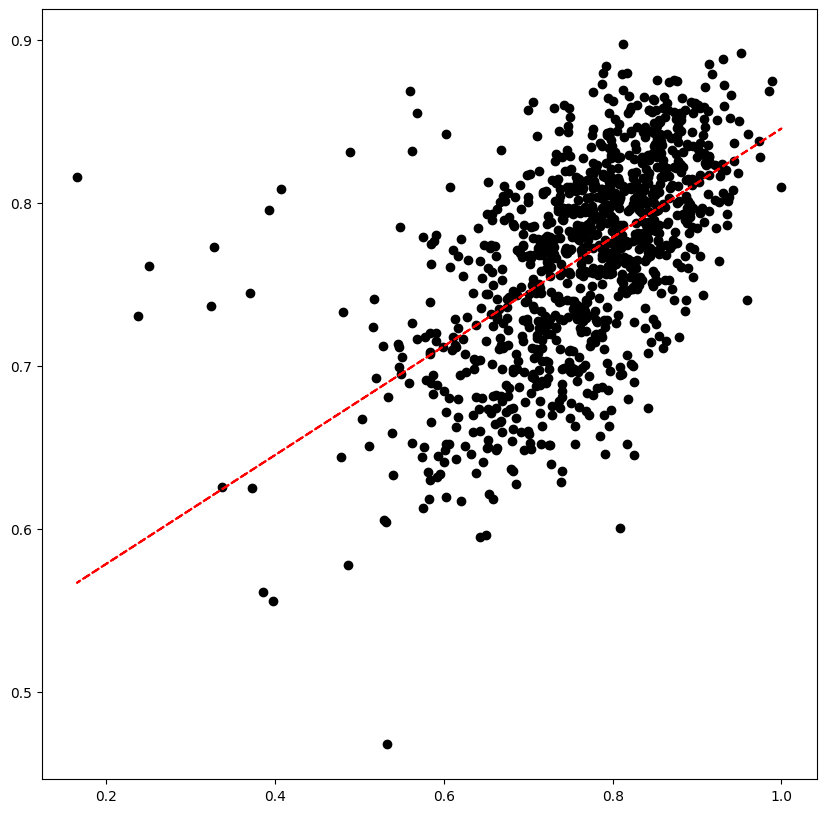

In [ ]:
#y의 추세2
#그림을 보면 추세를 어느정도 잘 따라간다고 볼 수 있음

import matplotlib.pylab as pylab
plt.figure(figsize = (10, 10))

#추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산
z = np.polyfit(y.iloc[val_idx], y_pre_test, 1)
p = np.poly1d(z)

pylab.plot(y.iloc[val_idx], y_pre_test, 'o', c = 'black')
pylab.plot(y.iloc[val_idx], p(y.iloc[val_idx]), 'r--')
plt.show

In [ ]:
feature_map = pd.DataFrame(sorted(zip(lgbm.feature_importances_, X.columns), reverse = True), columns = ['Score', 'Feature'])[:20]
print(feature_map)

    Score Feature
0     132     X23
1     100    X253
2      69     X16
3      61    X263
4      57    X271
5      57     X22
6      56    X275
7      56    X213
8      54    X268
9      54    X195
10     52    X273
11     50    X280
12     48    X261
13     48     X11
14     46    X266
15     46    X205
16     45    X267
17     44    X236
18     43      X8
19     43     X61


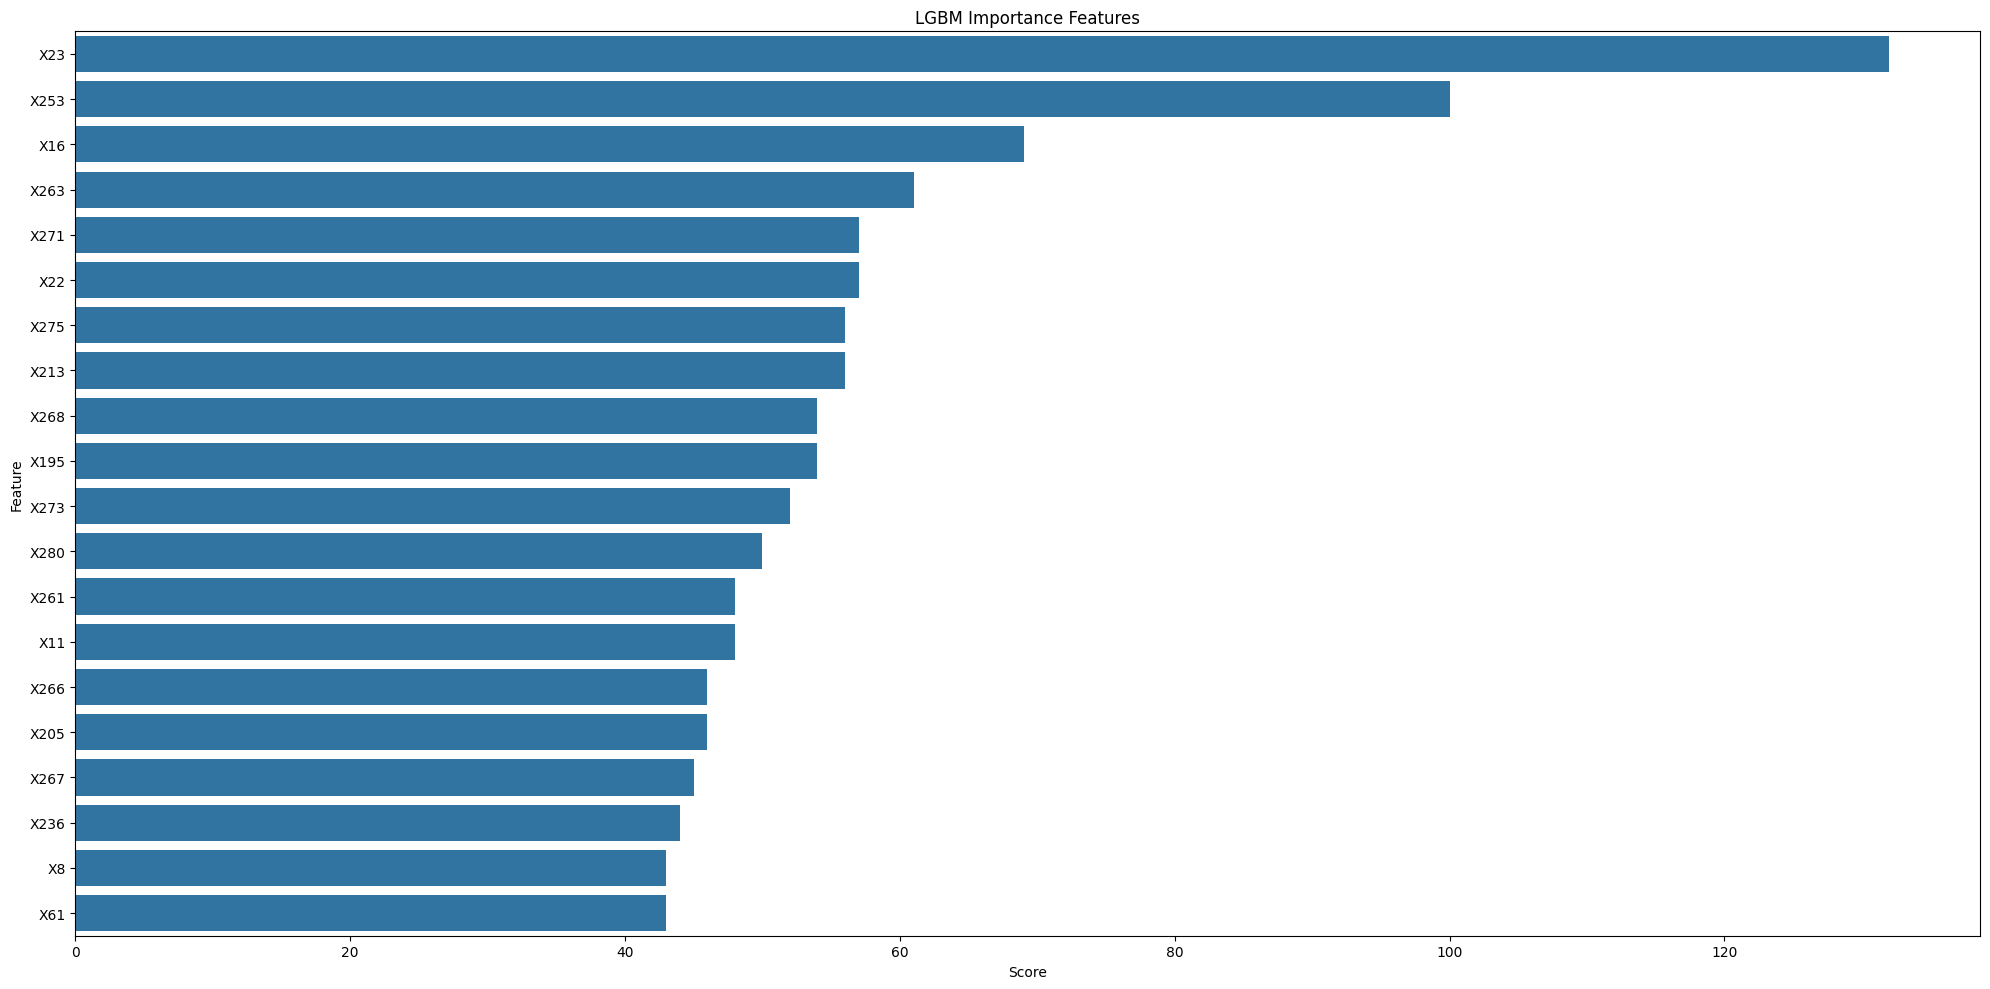

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Score', y = 'Feature', data = feature_map.sort_values(by = 'Score', ascending = False), errwidth = 40)
plt.title('LGBM Importance Features')
plt.tight_layout()
plt.show()

In [ ]:
#추후 과제

#y값을 3가지(고효울, 중효율, 저효율)로 분류한 뒤 Classification문제로 풀어본다
#Decision Tree를 사용하여 불순도가 낮은 노드를 찾아 고효율 패널 공정 레시피를 찾아보는 것이 좋다.

In [ ]:
#shap를 이용한 Feature Importance 분석

#data의 수가 10000개가 넘으면 원하는 데이터에 대해서만 그리기 추천

In [ ]:
sample_idx = list(range(0, X.shape[0], 10))
explainer = shap.TreeExplainer(lgbm)
shap_values =  explainer.shap_values(X)

In [ ]:
shap_values

array([[ 0.00000000e+00,  1.76419038e-04, -1.24942159e-03, ...,
         1.89191116e-04, -1.75189571e-05,  0.00000000e+00],
       [ 0.00000000e+00, -1.88869016e-04,  1.51800763e-03, ...,
         1.94572504e-04,  1.50166589e-04,  0.00000000e+00],
       [ 0.00000000e+00, -6.86665259e-05,  1.46752214e-03, ...,
         8.36302821e-05, -4.99765866e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -4.62707666e-04, -8.46633441e-04, ...,
         2.32925064e-04, -2.75857536e-05,  0.00000000e+00],
       [ 0.00000000e+00, -8.82530421e-06, -2.20825282e-03, ...,
        -8.71934207e-05,  7.16455261e-04,  0.00000000e+00],
       [ 0.00000000e+00, -7.00710553e-05, -1.60566168e-03, ...,
        -3.79169154e-04, -8.07824833e-05,  0.00000000e+00]])

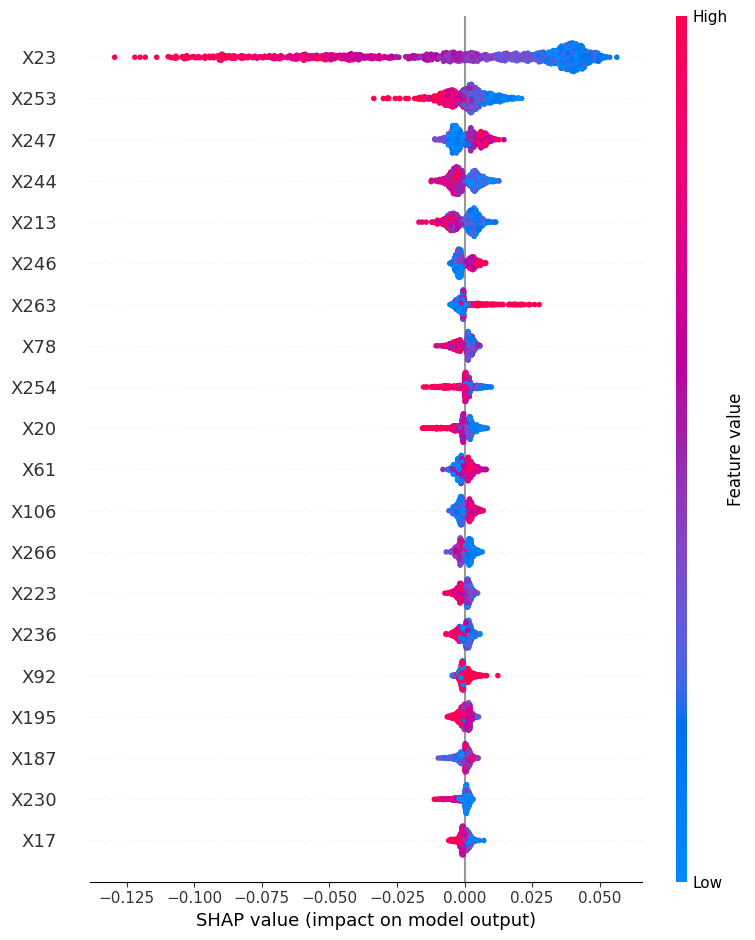

In [ ]:
#주요 변수별 영향, 방향성 plot
shap.summary_plot(shap_values[val_idx, :], X.iloc[val_idx])

In [ ]:
#X23: X23의 값이 낮을수록 y값 증가, X23의 값이 높을수록 y값 감소

#X253:위와 동일

#X247: X247 값이 높을수록 y값 증가, 낮을수록 감소

#X23의 영향력이 매우 큼

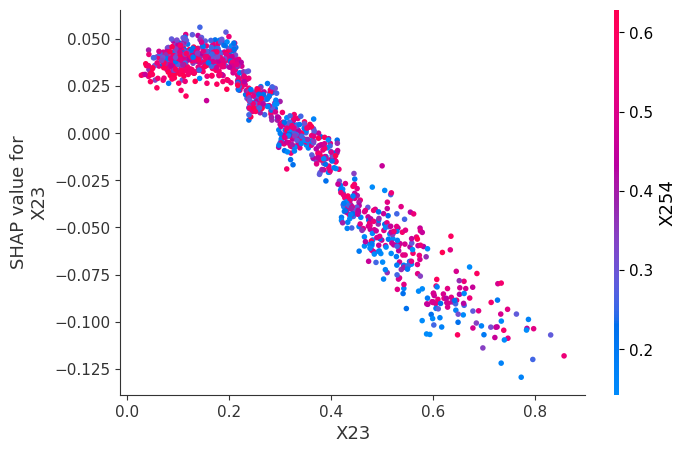

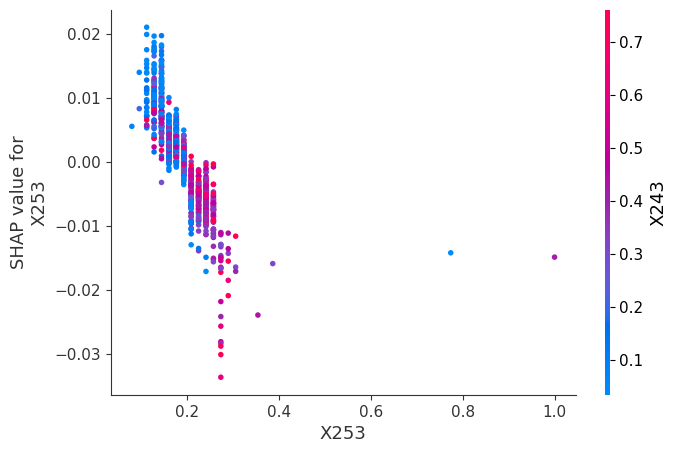

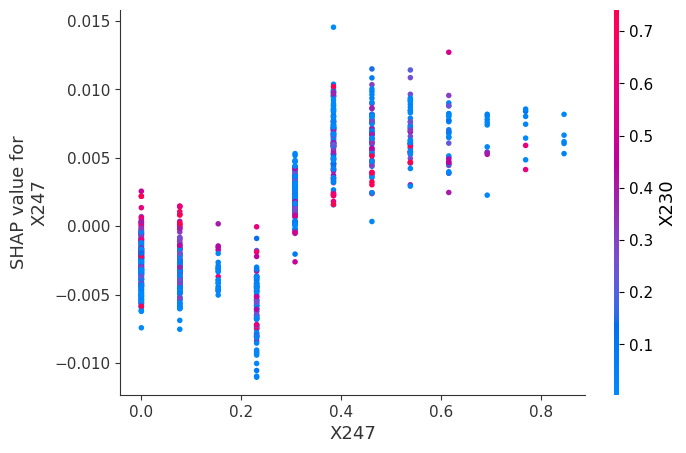

In [ ]:
#shap value의 절대값이 큰 순서대로 정렬
top = np.argsort(-np.sum(np.abs(shap_values), 0))
#영향력 Top 3에 대한 Dependence plot
for i in range(3):
  shap.dependence_plot(top[i], shap_values[val_idx, :], X.iloc[val_idx])

In [ ]:
#X23이 작을수록, X254가 커질수록 shap value가 높아짐

#X243이 작을수록, X253이 커질수록 shap value가 높아짐

#247과 X230의 관계는 특별한 고나계가 보이지 않는다

In [ ]:
#고효율군 상위 10%를 추출하고, mse가 낮은 데이터 추출하여 원인 분석
#mse가 낮은 데이터 추출하는 것은 모델이 학습을 잘했다는 뜻
#이를 바탕으로 고효율 데이터 추출하여 원인분석하는 것이 효과적

In [ ]:
y.describe()

count    3500.000000
mean        0.765216
std         0.103392
min         0.000000
25%         0.712546
50%         0.777598
75%         0.834474
max         1.000000
Name: Y, dtype: float64

In [ ]:
#Cutting
y_cut = np.percentile(df['Y'], 90)
print(y_cut)

0.8838753059


In [ ]:
#total data prediction
total = lgbm.predict(X)

In [ ]:
X.reset_index(drop = True, inplace = True)

In [ ]:
y.reset_index(drop = True, inplace = True)

In [ ]:
total_y = pd.concat([y, pd.DataFrame(total, columns = ['pred'])], axis = 1)
total_y['rmse'] = np.sqrt((total_y['Y'] - total_y['pred'])**2)#rmse

In [ ]:
total_y

,Y,pred,rmse
0,0.870905,0.808693,0.062211
1,0.866993,0.841335,0.025658
2,0.898472,0.871314,0.027158
3,0.740892,0.765276,0.024384
4,0.887714,0.885610,0.002103
...,...,...,...
3495,0.848716,0.849168,0.000452
3496,0.639548,0.714912,0.075364
3497,0.642115,0.680444,0.038329
3498,0.904156,0.857648,0.046508


In [ ]:
#val data만 사용, mse top 10 추출
tmp = total_y.iloc[val_idx]
tmp = tmp[tmp['Y'] >= y_cut].sort_values(by='rmse')
pick_idx = list(tmp.iloc[:10].index)

In [ ]:
pick_idx

[2858, 474, 2192, 310, 678, 23, 3478, 2848, 2187, 70]

In [ ]:
y_cut

0.8838753059

In [ ]:
total_y.iloc[pick_idx]

,Y,pred,rmse
2858,0.885208,0.856890,0.028318
474,0.913814,0.885112,0.028702
2192,0.892665,0.862176,0.030489
310,0.897738,0.861473,0.036265
678,0.897005,0.859972,0.037033
23,0.909658,0.871112,0.038546
3478,0.918093,0.879100,0.038993
2848,0.895416,0.855242,0.040173
2187,0.901589,0.860018,0.041571
70,0.930440,0.888065,0.042375


2858


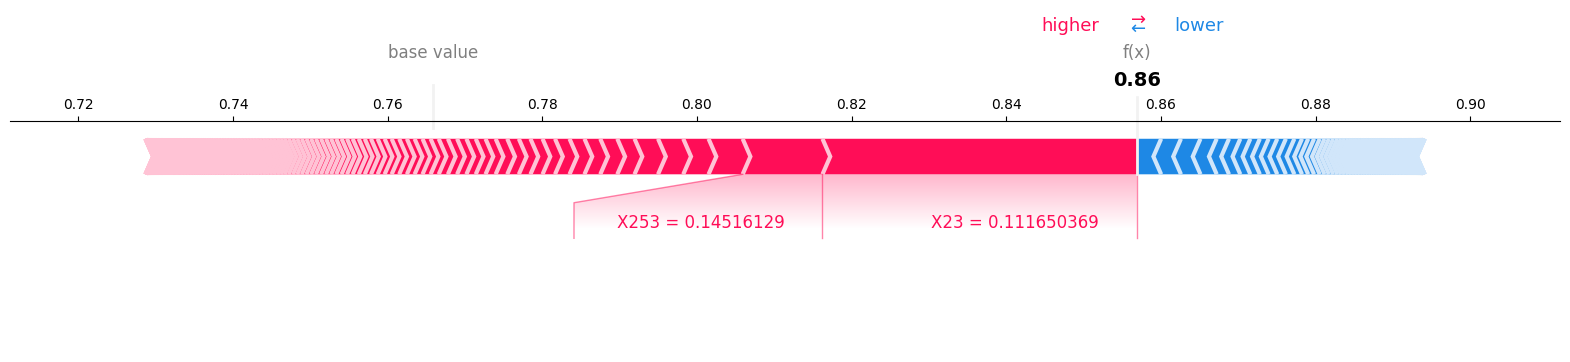

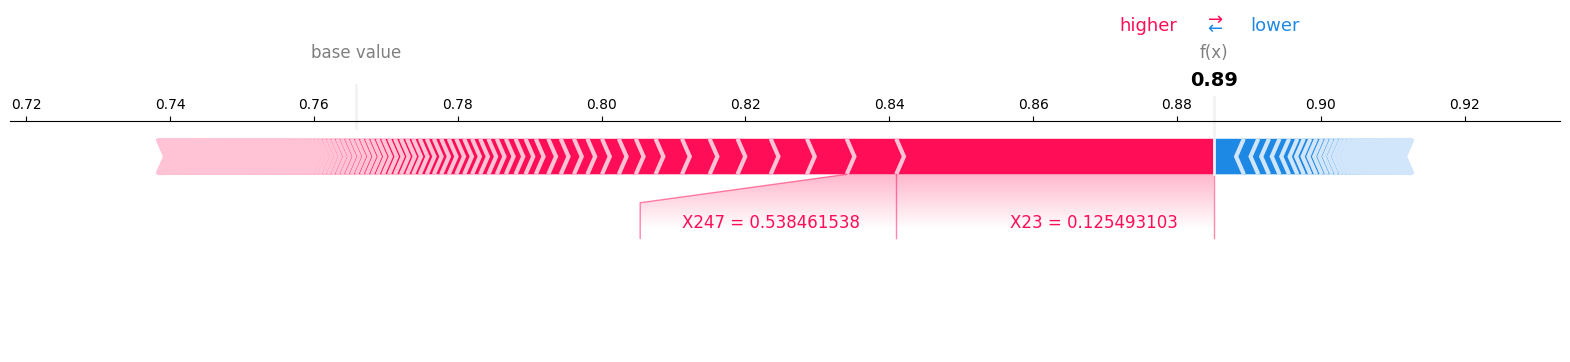

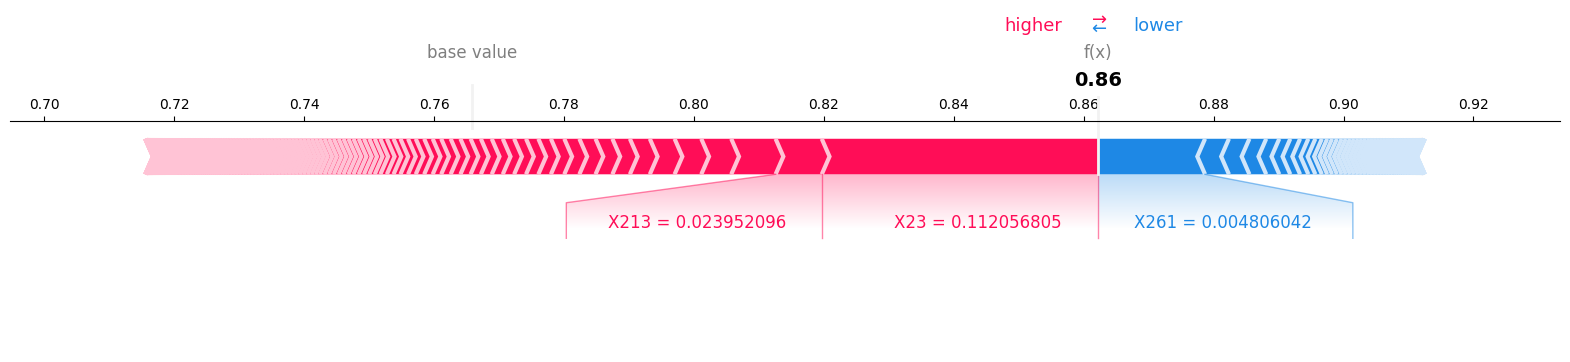

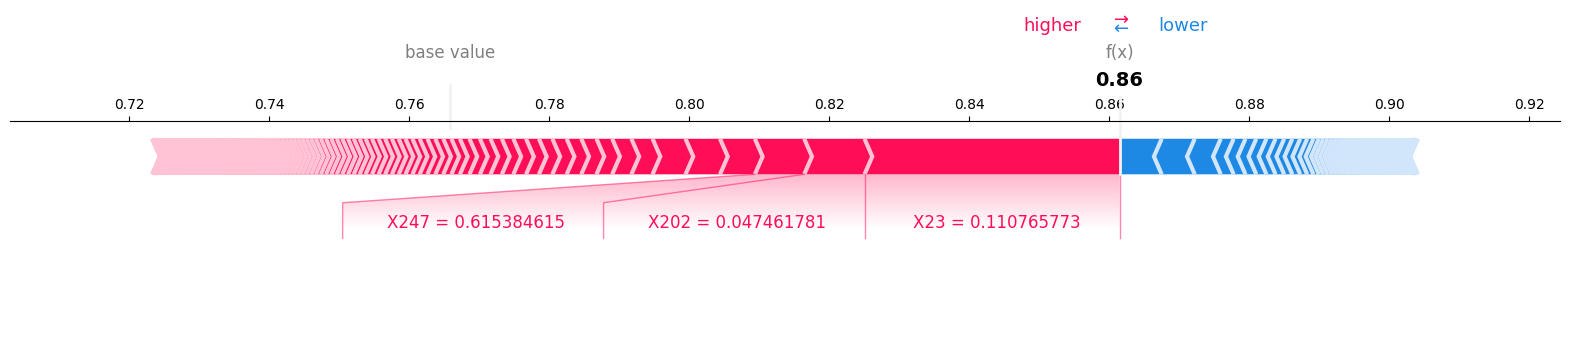

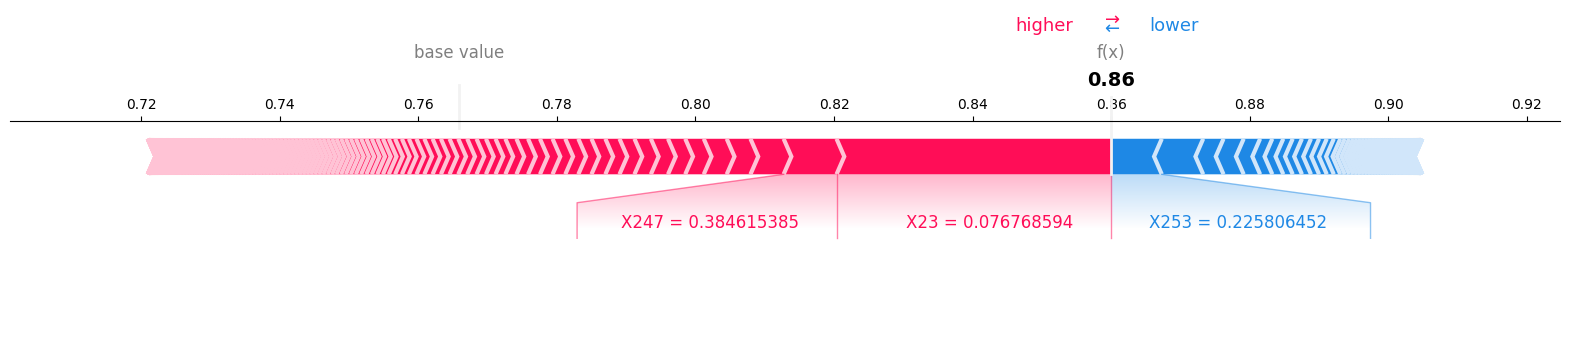

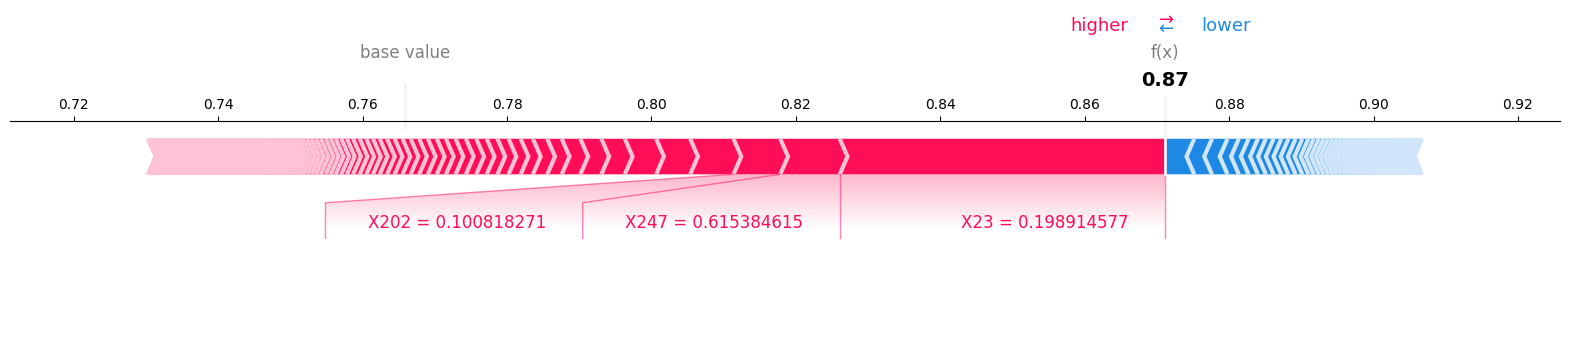

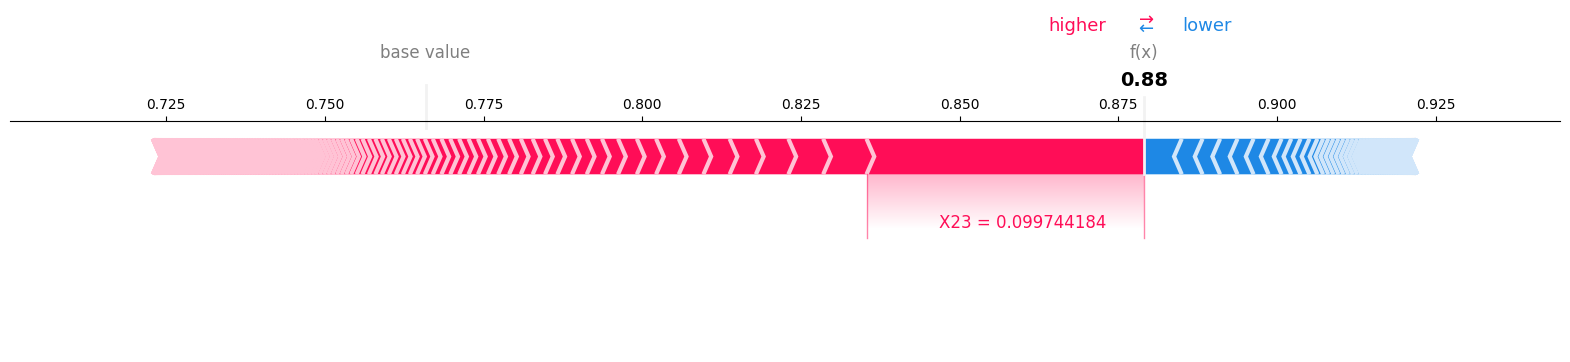

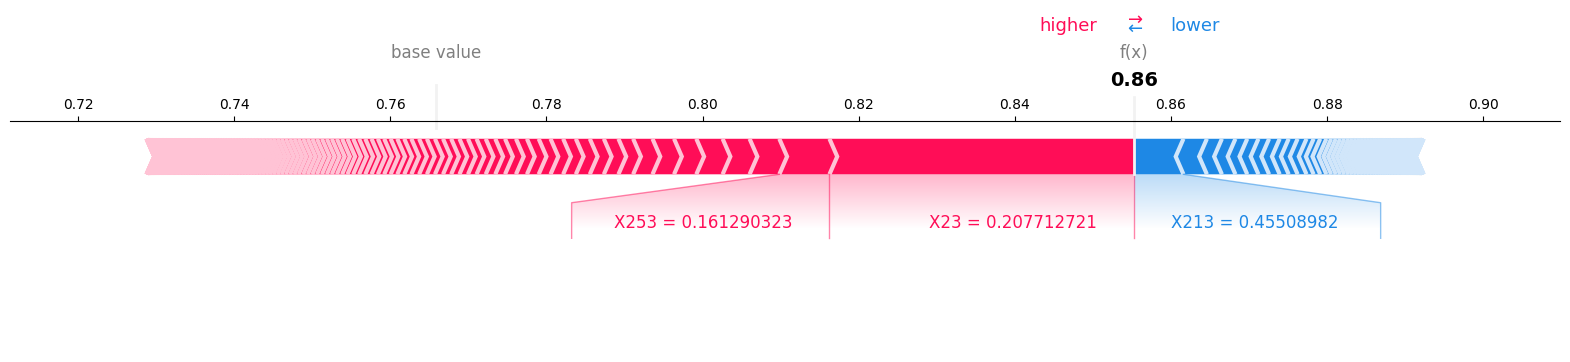

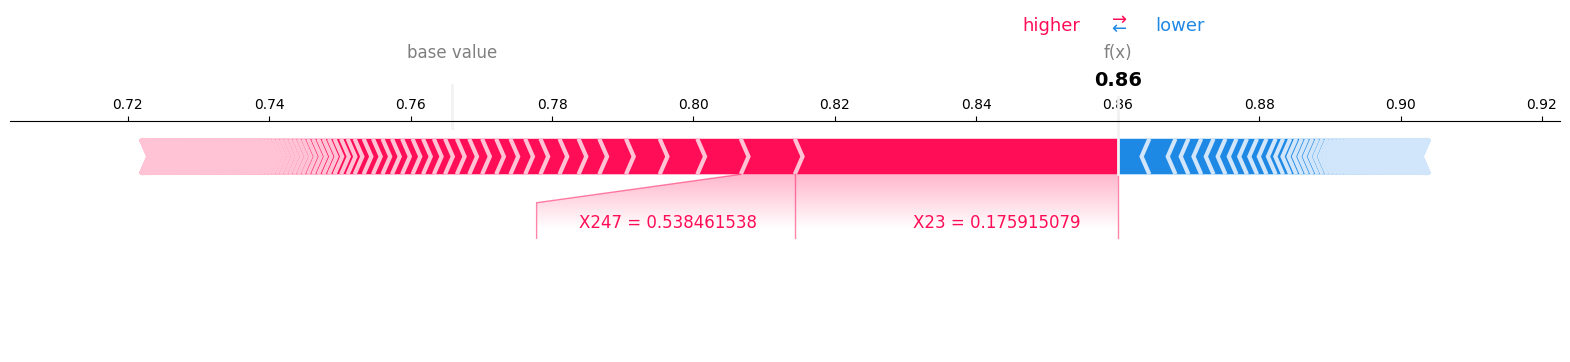

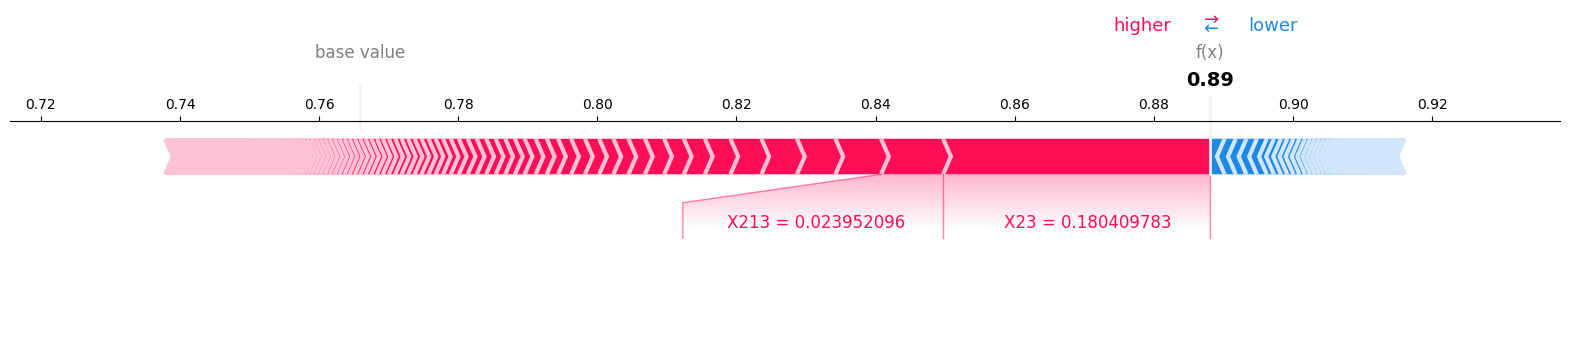

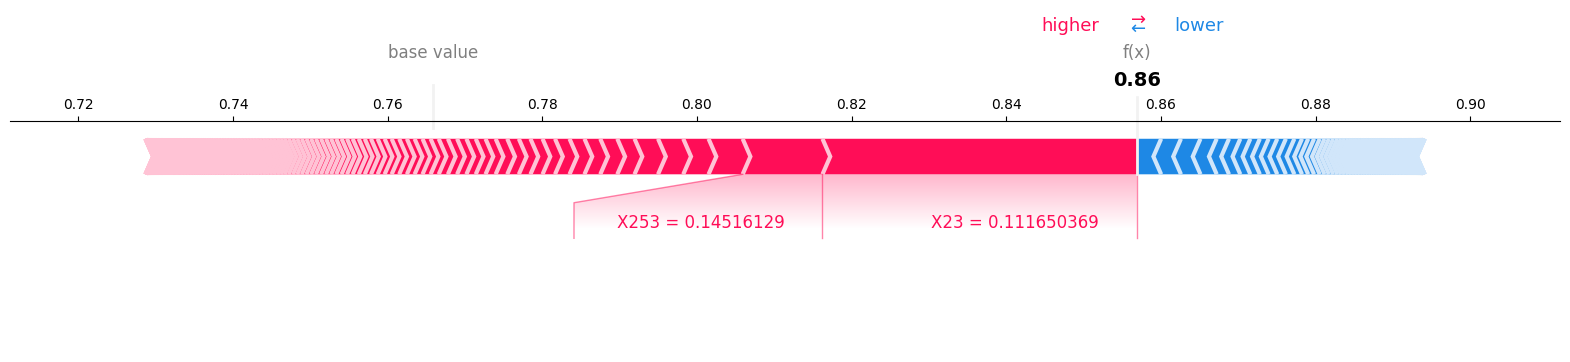

474


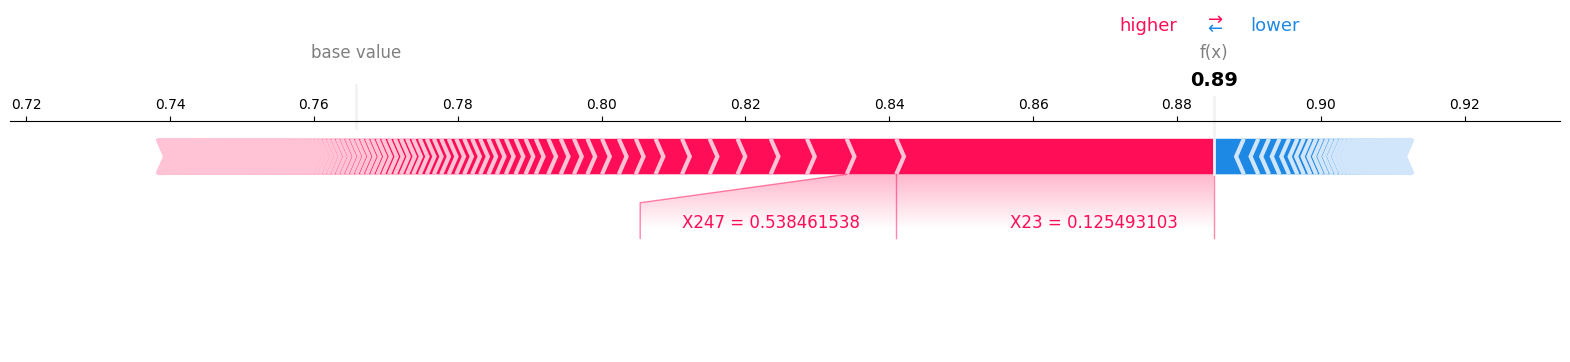

2192


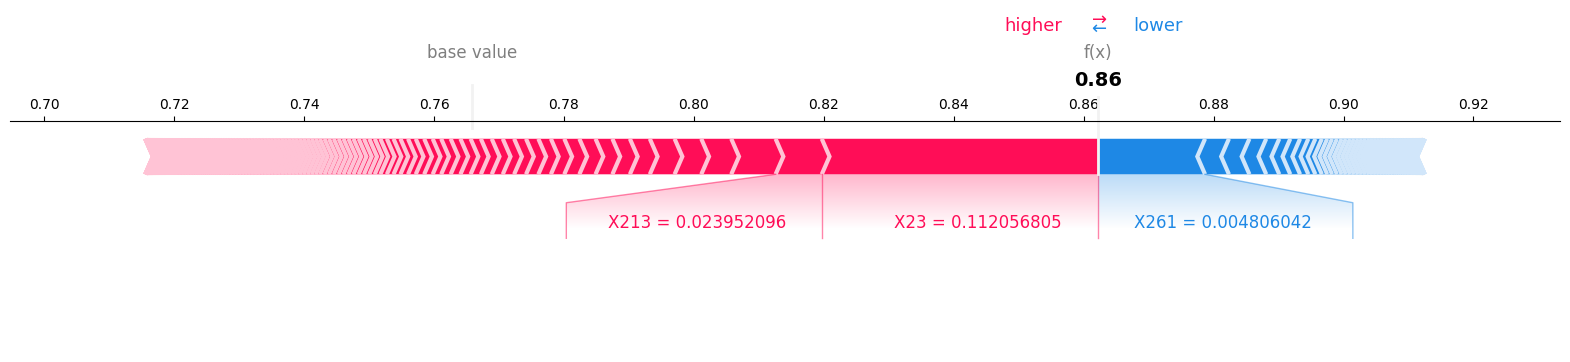

310


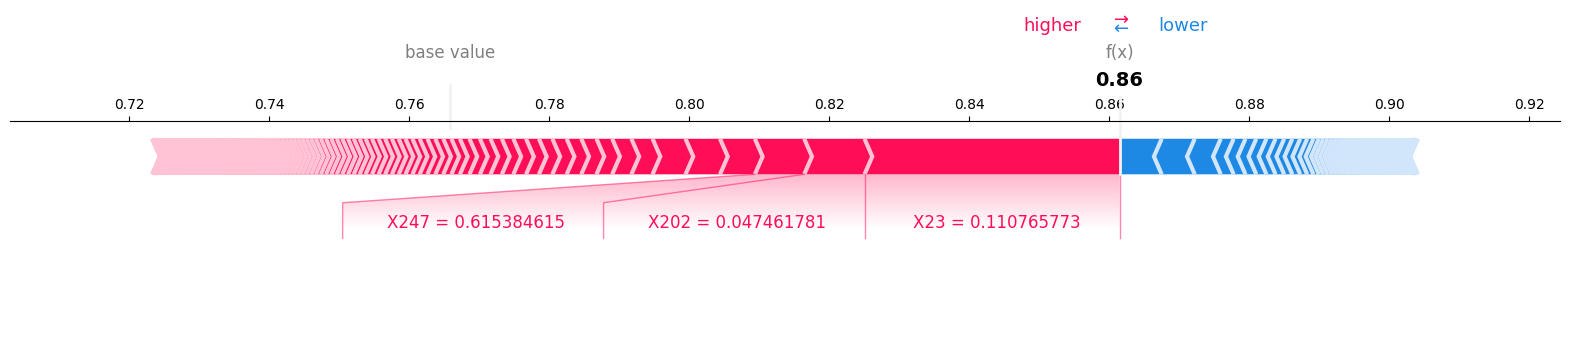

678


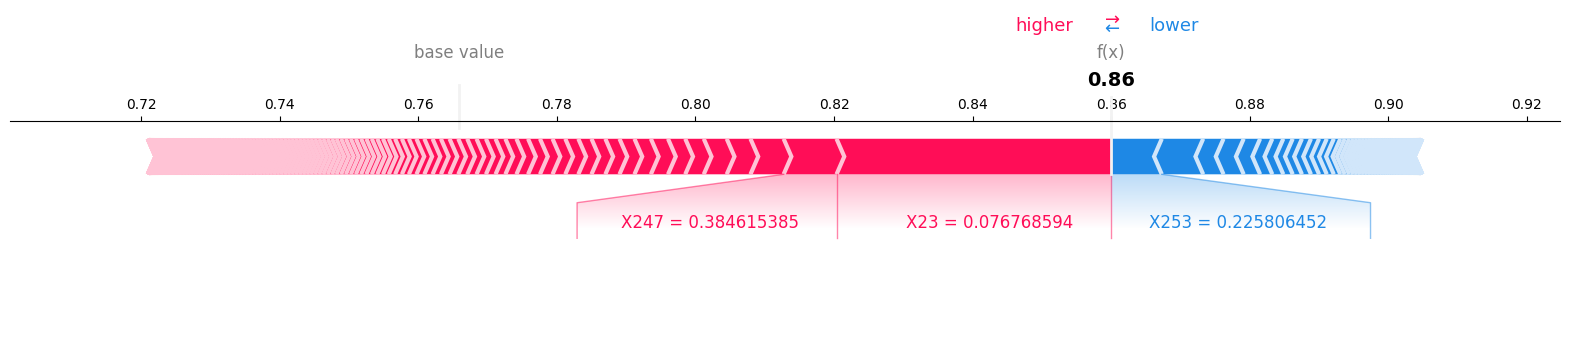

23


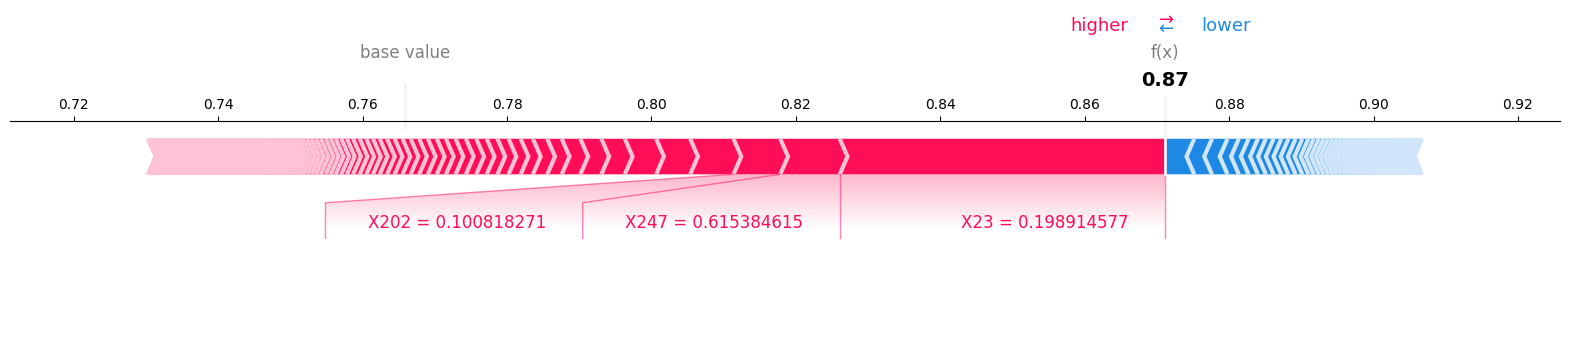

3478


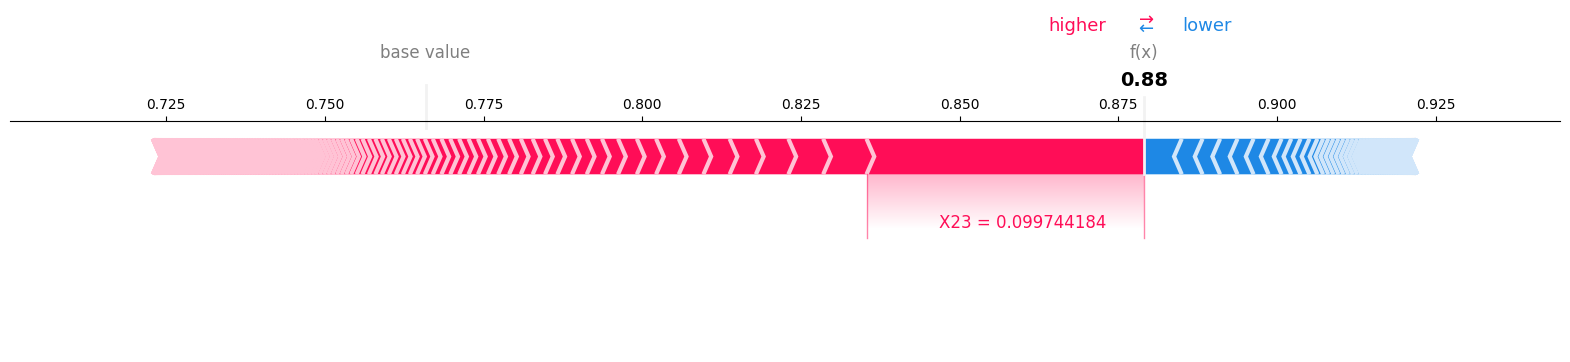

2848


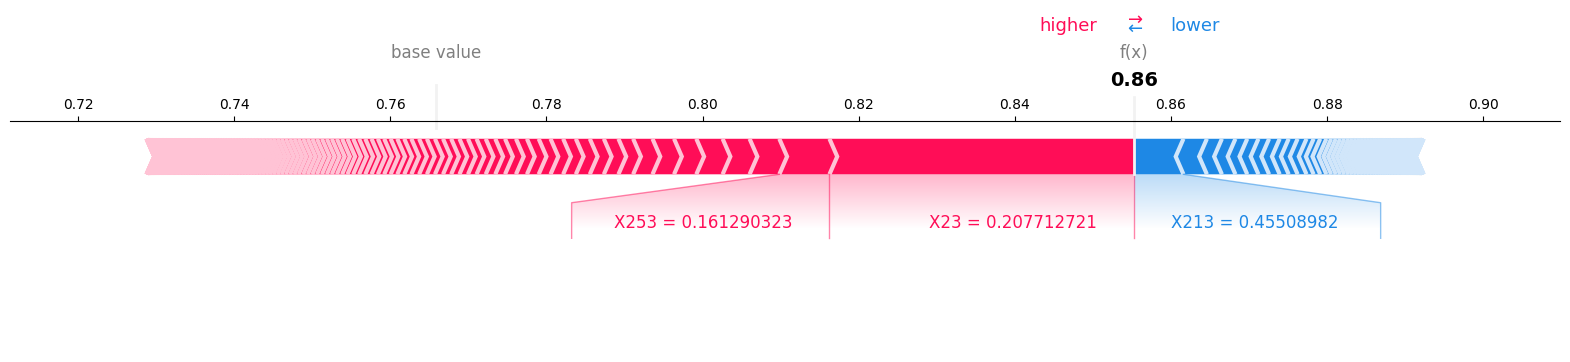

2187


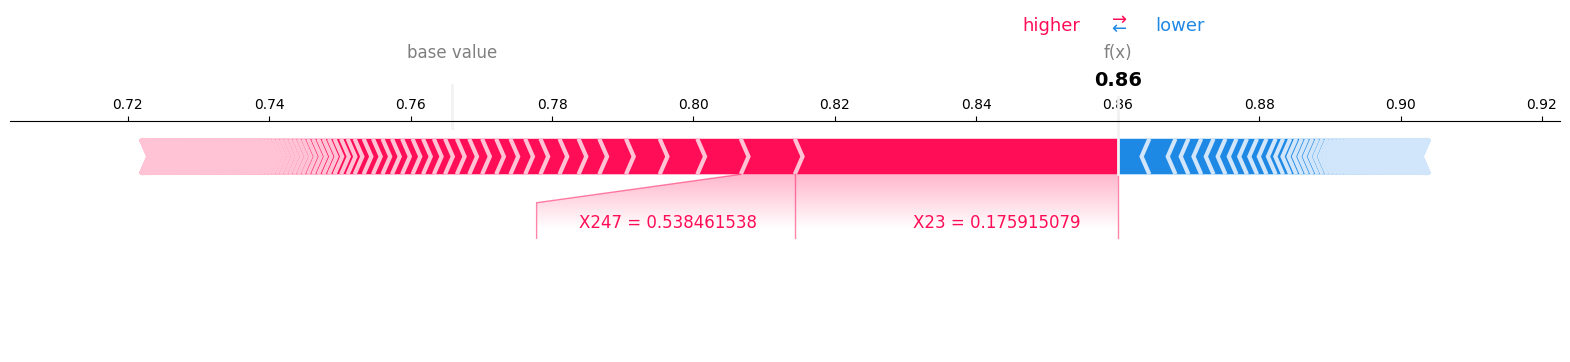

70


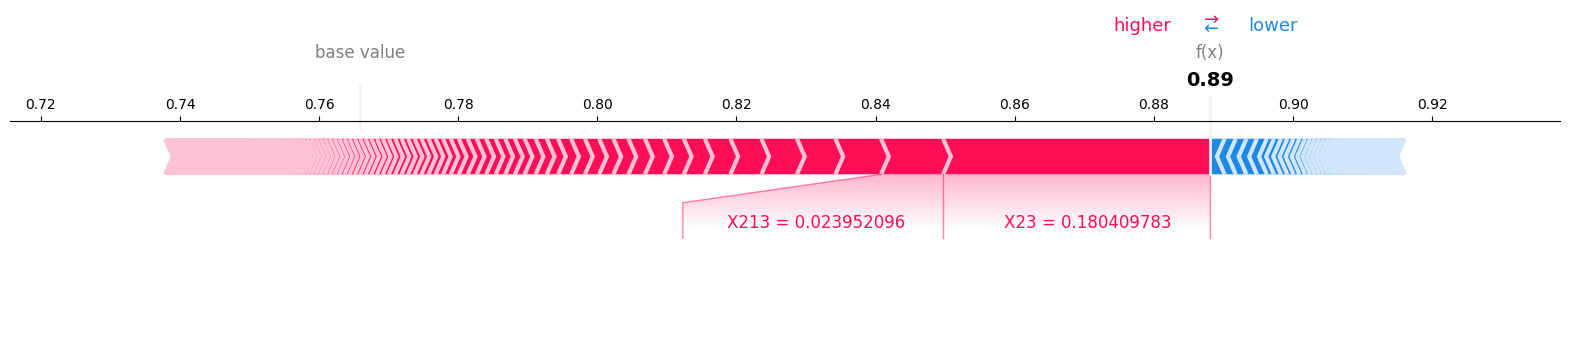

In [ ]:
#plot
shap.initjs()

for i, idx in enumerate(pick_idx):
  print(idx)
  shap.force_plot(explainer.expected_value,
                        shap_values[idx, :],
                        X.iloc[idx],
                        matplotlib = True, show = True)

#Summary

X23이 효율에 매우 큰 영향력을 미치니 공정 레시피에서 X23의 영향력을 더욱 끌어올리면

그만큼 태양광 패널의 효율이 증가하여 에너지 생산 효율이 올라갈 것으로 예측

생산 효율이 올라간 만큼 추가적인 순이익 발생 기대 가능